In [21]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Calculo el phi usando como radio 3 kpc comovil

In [23]:
import h5py
import rotation as rot
import barstrength as strng
import time_conversion as tiempo

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

vector = ('00','01','03')
vector3 = ('M31','MW','M33')
vector2= ('blue', 'red', 'green')

atime = np.loadtxt('/home/ornela/SimCLUES/redshift_outputs.txt')
aexp = atime[:,2]

j=0
snapshot=range(496,50,-1)
for isnap in snapshot:
    snap = h5py.File('/home/ornela/SimCLUES/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    
    for i in range(0,1):
        cm   = snap['subhalo_0'+ str('%s' %vector[i])+ '/Center'].value
        r200 = snap['subhalo_0'+ str('%s' %vector[i])+ '/R200'].value

        pstr = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Coordinates'].value
        mstr = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Masses'].value
        vel  = snap['subhalo_0'+ str('%s' %vector[i])+ '/Str/Velocities'].value

        z = a0/aexp[isnap] - 1.
        Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
        time = tiempo.conv(z, h, omega_lambda, omega_matter)
        
#---aca paso las coordenadas respecto al centro de la galaxia------
        xstr = (pstr[:,0]-cm[0])*aexp[isnap]/h
        ystr = (pstr[:,1]-cm[1])*aexp[isnap]/h
        zstr = (pstr[:,2]-cm[2])*aexp[isnap]/h
        r = np.sqrt(xstr**2+ystr**2+zstr**2)
         
        v_x = vel[:,0] *np.sqrt(aexp[isnap]) + Ht *xstr/1000.
        v_y = vel[:,1] *np.sqrt(aexp[isnap]) + Ht *ystr/1000.
        v_z = vel[:,2] *np.sqrt(aexp[isnap]) + Ht *zstr/1000.
        
#----------------------masas----------------------------
        mstr = mstr/h
        
        r200 = r200*aexp[isnap]/h
        
        rgal=0.15*r200
        
        limit = np.where(r < rgal)
        r_sort = np.sort(r[limit])
        r_indice = np.argsort(r[limit])
        
        Mc_str = cumsum((mstr[limit])[r_indice])
        M_gal = Mc_str[-1]
        
#------------------ calculamos M90------------------------------------------
        razon = Mc_str/M_gal
        noventa, = np.where(razon < 0.9)
        cincuenta, = np.where(razon < 0.5)
        
        r90 = r_sort[noventa][-1]
        r50 = r_sort[cincuenta][-1]
#         M90 = Mc_str[noventa]                

#-------------------------------------------------------------------            
        corte1,=np.where(r<3*aexp[isnap])
        corte2,=np.where(r<2.5*aexp[isnap])
        veloc,=np.where(r<r50)
        
#----------componentes de la velocidad del centro de masa------------
        vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
        vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
        vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])
        
#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
        vx = v_x - vxcm
        vy = v_y - vycm
        vz = v_z - vzcm
        
        e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,3*aexp[isnap])

        xn = e1x*xstr + e1y*ystr + e1z*zstr
        yn = e2x*xstr + e2y*ystr + e2z*zstr
        zn = e3x*xstr + e3y*ystr + e3z*zstr
        vxn = e1x*vx + e1y*vy + e1z*vz
        vyn = e2x*vx + e2y*vy + e2z*vz
        vzn = e3x*vx + e3y*vy + e3z*vz
        
#         A2max1, rmax1, phimax1 = strng.a2max(mstr[corte1], xn[corte1], yn[corte1], 20)
        
        A2max2, rmax2, phimax2 = strng.a2max(mstr[corte1], xn[corte1], yn[corte1], 20)

#--------------------------------------------------------------------------------------------------------------------

#         archivo1 =  open('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/'+str('%s'%vector3[i])+'_A2max_time1.dat','a')
#         archivo1.write(str('%12.6f'% time) +'\t'+
#                  str('%12.6f'% A2max1) +'\t'+
#                  str('%12.6f'% phimax1) +'\t'+
#                  str('%12.6f'% rmax1) +'\n')
#         archivo1.close()
        
        archivo2 =  open('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/'+str('%s'%vector3[i])+'_testphi_time.dat','a')
        archivo2.write(str('%12.6f'% time) +'\t'+
                 str('%12.6f'% A2max2) +'\t'+
                 str('%12.6f'% phimax2) +'\t'+
                 str('%12.6f'% rmax2) +'\n')
        archivo2.close()

In [24]:
M31_gd1 = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/M31_testphi_time.dat')
time_M31gd1  = M31_gd1[:,0]
A2max_M31gd1 = M31_gd1[:,1]
phim_M31gd1  = M31_gd1[:,2]
rmax_M31gd1  = M31_gd1[:,3]

In [25]:
print phim_M31gd1[0]/2.

0.8698495


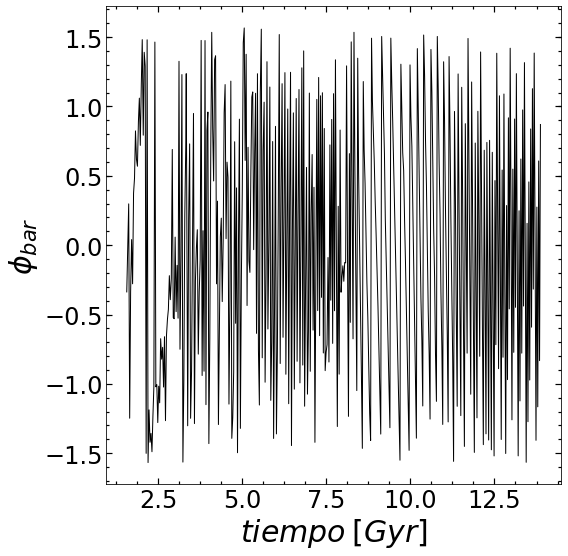

In [26]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time_M31gd1, phim_M31gd1/2,'k-', lw=1)
# ax.set_xlim(7.5,14)
# ax.set_xlim(13,14)
ax.minorticks_on()
ax.tick_params(labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')
# ax.set_facecolor('silver')
# ax.grid(color='w',linestyle=':',which='major')
#ax.grid(color='lightgray',linestyle=':',which='minor')
ax.set_xlabel(r'$tiempo\:[Gyr]$', fontsize=30)
ax.set_ylabel(r'$\phi_{bar}$',fontsize=30)
#ax3.axis('square') #hace el plot cuadrado

# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_04.pdf', dpi = 100)
plt.show()

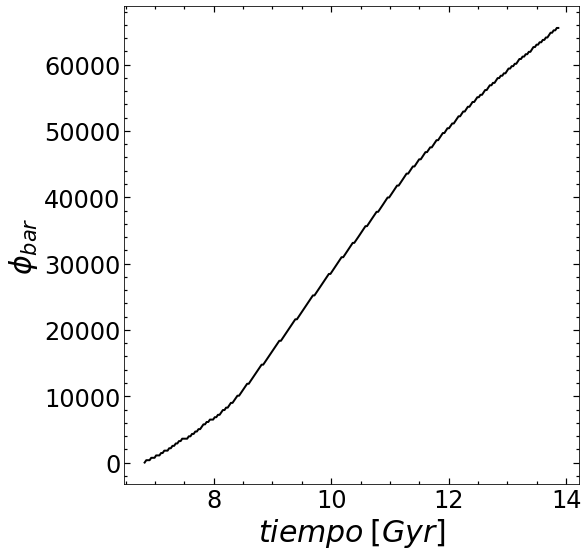

In [27]:
mask, = np.where(time_M31gd1 > 6.8) 
time_M31gd12 = time_M31gd1[mask]
phim_M31gd12 = phim_M31gd1[mask]/2.
        
ang = np.zeros(len(phim_M31gd12))
ang[-1] = phim_M31gd12[-1]

j = 1
kk = len(phim_M31gd12)-1

for i in range(kk,0,-1):
    aux = phim_M31gd12[i] - phim_M31gd12[i-1]
    
    if aux > 0:
        ang[i-1] = phim_M31gd12[i-1] + 360*j
        j += 1
        
    else:
        ang[i-1] = phim_M31gd12[i-1] + 360*(j-1)

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time_M31gd12, ang,'k-', lw=2)
# ax.set_xlim(7.5,14)
# ax.set_ylim(8,18)
ax.minorticks_on()
ax.tick_params(labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')
# ax.set_facecolor('silver')
# ax.grid(color='w',linestyle=':',which='major')
#ax.grid(color='lightgray',linestyle=':',which='minor')
ax.set_xlabel(r'$tiempo\:[Gyr]$', fontsize=30)
ax.set_ylabel(r'$\phi_{bar}$',fontsize=30)
#ax3.axis('square') #hace el plot cuadrado

# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_04.pdf', dpi = 100)
plt.show()

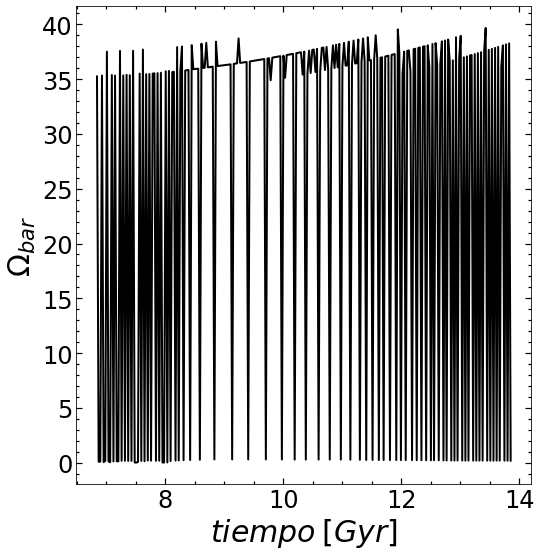

In [28]:
kk = len(ang)-1

delta_phi = np.zeros(len(ang))
delta_t = np.zeros(len(ang))
tt = np.zeros(len(ang))

for i in range(kk,0,-1):
    delta_t [i]  = time_M31gd12[i-1] - time_M31gd12[i]
    delta_phi[i] = ang[i-1] - ang[i]
    tt[i] = (time_M31gd12[i-1] + time_M31gd12[i]) / 2.

delta_t   = delta_t[1:]
delta_phi = delta_phi[1:]
tt = tt[1:]

veloc_ang = delta_phi/delta_t

#-------------------------------------------------------------------------------------
# d = np.ndarray([np.size(tt),2])
# d[:,0] = tt
# d[:,1] = veloc_ang

# np.savetxt('/home/ornela/python/barras/derivada_phi_time.dat', d, fmt=('%12.6f', '%12.6f'))
#-------------------------------------------------------------------------------------

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(tt, veloc_ang/360.,'k-', lw=2)
# ax.set_xlim(7.5,14)
# ax.set_ylim(8,18)
# ax.spines['bottom'].set_color('w')
# ax.spines['top'].set_color('w')
# ax.spines['left'].set_color('w')
# ax.spines['right'].set_color('w')
ax.minorticks_on()
ax.tick_params(labelsize=24)#, colors='lightgray')
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
# ax.set_facecolor('silver')
# ax.grid(color='w',linestyle=':',which='major')
#ax.grid(color='lightgray',linestyle=':',which='minor')
ax.set_xlabel(r'$tiempo\:[Gyr]$', fontsize=30)#, color='lightgray')
ax.set_ylabel(r'$\Omega_{bar}$',fontsize=30)#, color='lightgray')
#ax3.twinx() #me hace un eje del otro lado
#ax3.axis('square') #hace el plot cuadrado
#ax3.set_axisbelow(True)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_04.pdf', dpi = 100)
plt.show()

In [ ]:
# dd = range(496,300,-1)
#     dd.remove(428)
#     if isnap in dd:
#         raux = 2*r50
#     elif (isnap == 428) or ((isnap < 301) & (isnap > 283)):
#         raux = r50
#     elif (isnap > 271) & (isnap < 284):
#         raux = 0.75
#     elif isnap < 272:
#         raux = 0.5

### vuelvo a calcular el viejo phi con el raux

In [29]:
import h5py
import rotation as rot
import barstrength as strng
import time_conversion as tiempo

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

vector = ('00','01','03')
vector3 = ('M31','MW','M33')
vector2= ('blue', 'red', 'green')

atime = np.loadtxt('/home/ornela/SimCLUES/redshift_outputs.txt')
aexp = atime[:,2]

j=0
snapshot=range(496,50,-1)
for isnap in snapshot:
    snap = h5py.File('/home/ornela/SimCLUES/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    
    for i in range(0,1):
        cm   = snap['subhalo_0'+ str('%s' %vector[i])+ '/Center'].value
        r200 = snap['subhalo_0'+ str('%s' %vector[i])+ '/R200'].value

        pstr = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Coordinates'].value
        mstr = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Masses'].value
        vel  = snap['subhalo_0'+ str('%s' %vector[i])+ '/Str/Velocities'].value

        z = a0/aexp[isnap] - 1.
        Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
        time = tiempo.conv(z, h, omega_lambda, omega_matter)
        
#---aca paso las coordenadas respecto al centro de la galaxia------
        xstr = (pstr[:,0]-cm[0])*aexp[isnap]/h
        ystr = (pstr[:,1]-cm[1])*aexp[isnap]/h
        zstr = (pstr[:,2]-cm[2])*aexp[isnap]/h
        r = np.sqrt(xstr**2+ystr**2+zstr**2)
         
        v_x = vel[:,0] *np.sqrt(aexp[isnap]) + Ht *xstr/1000.
        v_y = vel[:,1] *np.sqrt(aexp[isnap]) + Ht *ystr/1000.
        v_z = vel[:,2] *np.sqrt(aexp[isnap]) + Ht *zstr/1000.
        
#----------------------masas----------------------------
        mstr = mstr/h
        
        r200 = r200*aexp[isnap]/h
        
        rgal=0.15*r200
        
        limit = np.where(r < rgal)
        r_sort = np.sort(r[limit])
        r_indice = np.argsort(r[limit])
        
        Mc_str = cumsum((mstr[limit])[r_indice])
        M_gal = Mc_str[-1]
        
#------------------ calculamos M90------------------------------------------
        razon = Mc_str/M_gal
        noventa, = np.where(razon < 0.9)
        cincuenta, = np.where(razon < 0.5)
        
        r90 = r_sort[noventa][-1]
        r50 = r_sort[cincuenta][-1]
#         M90 = Mc_str[noventa]                

#-------------------------------------------------------------------            
    
        veloc,=np.where(r<r50)
        
#----------componentes de la velocidad del centro de masa------------
        vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
        vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
        vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])
        
#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
        vx = v_x - vxcm
        vy = v_y - vycm
        vz = v_z - vzcm
        
        dd = range(496,300,-1)
        dd.remove(428)
        if isnap in dd:
            raux = 2*r50
        elif (isnap == 428) or ((isnap < 301) & (isnap > 283)):
            raux = r50
        elif (isnap > 271) & (isnap < 284):
            raux = 0.75
        elif isnap < 272:
            raux = 0.5
            
        corte0,=np.where(r<raux)
        corte1,=np.where(r<3*aexp[isnap])
        corte2,=np.where(r<2.5*aexp[isnap])
        
        e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,raux)

        xn = e1x*xstr + e1y*ystr + e1z*zstr
        yn = e2x*xstr + e2y*ystr + e2z*zstr
        zn = e3x*xstr + e3y*ystr + e3z*zstr
        vxn = e1x*vx + e1y*vy + e1z*vz
        vyn = e2x*vx + e2y*vy + e2z*vz
        vzn = e3x*vx + e3y*vy + e3z*vz
        
#         A2max1, rmax1, phimax1 = strng.a2max(mstr[corte1], xn[corte1], yn[corte1], 20)
        
        A2max2, rmax2, phimax2 = strng.a2max(mstr[corte0], xn[corte0], yn[corte0], 20)

#--------------------------------------------------------------------------------------------------------------------

#         archivo1 =  open('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/'+str('%s'%vector3[i])+'_A2max_time1.dat','a')
#         archivo1.write(str('%12.6f'% time) +'\t'+
#                  str('%12.6f'% A2max1) +'\t'+
#                  str('%12.6f'% phimax1) +'\t'+
#                  str('%12.6f'% rmax1) +'\n')
#         archivo1.close()
        
        archivo2 =  open('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/'+str('%s'%vector3[i])+'_testphi_time2.dat','a')
        archivo2.write(str('%12.6f'% time) +'\t'+
                 str('%12.6f'% A2max2) +'\t'+
                 str('%12.6f'% phimax2) +'\t'+
                 str('%12.6f'% rmax2) +'\n')
        archivo2.close()

In [30]:
M31_gd1 = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/M31_testphi_time2.dat')
time_M31gd1  = M31_gd1[:,0]
A2max_M31gd1 = M31_gd1[:,1]
phim_M31gd1  = M31_gd1[:,2]
rmax_M31gd1  = M31_gd1[:,3]

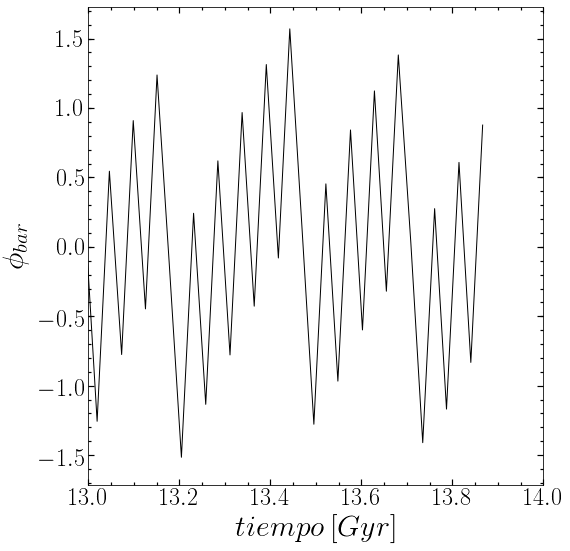

In [54]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time_M31gd1, phim_M31gd1/2,'k-', lw=1)
# ax.set_xlim(7.5,14)
ax.set_xlim(13,14)
ax.minorticks_on()
ax.tick_params(labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')
# ax.set_facecolor('silver')
# ax.grid(color='w',linestyle=':',which='major')
#ax.grid(color='lightgray',linestyle=':',which='minor')
ax.set_xlabel(r'$tiempo\:[Gyr]$', fontsize=30)
ax.set_ylabel(r'$\phi_{bar}$',fontsize=30)
#ax3.axis('square') #hace el plot cuadrado

# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_04.pdf', dpi = 100)
plt.show()

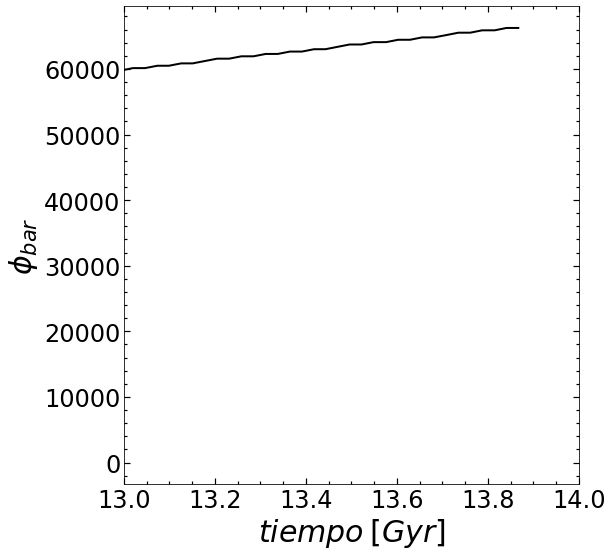

In [34]:
mask, = np.where(time_M31gd1 > 6.8) 
time_M31gd12 = time_M31gd1[mask]
phim_M31gd12 = phim_M31gd1[mask]/2.
        
ang = np.zeros(len(phim_M31gd12))
ang[-1] = phim_M31gd12[-1]

j = 1
kk = len(phim_M31gd12)-1

for i in range(kk,0,-1):
    aux = phim_M31gd12[i] - phim_M31gd12[i-1]
    
    if aux > 0:
        ang[i-1] = phim_M31gd12[i-1] + 360*j
        j += 1
        
    else:
        ang[i-1] = phim_M31gd12[i-1] + 360*(j-1)

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time_M31gd12, ang,'k-', lw=2)
# ax.set_xlim(13,14)
# ax.set_ylim(8,18)
ax.minorticks_on()
ax.tick_params(labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')
# ax.set_facecolor('silver')
# ax.grid(color='w',linestyle=':',which='major')
#ax.grid(color='lightgray',linestyle=':',which='minor')
ax.set_xlabel(r'$tiempo\:[Gyr]$', fontsize=30)
ax.set_ylabel(r'$\phi_{bar}$',fontsize=30)
#ax3.axis('square') #hace el plot cuadrado

# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_04.pdf', dpi = 100)
plt.show()

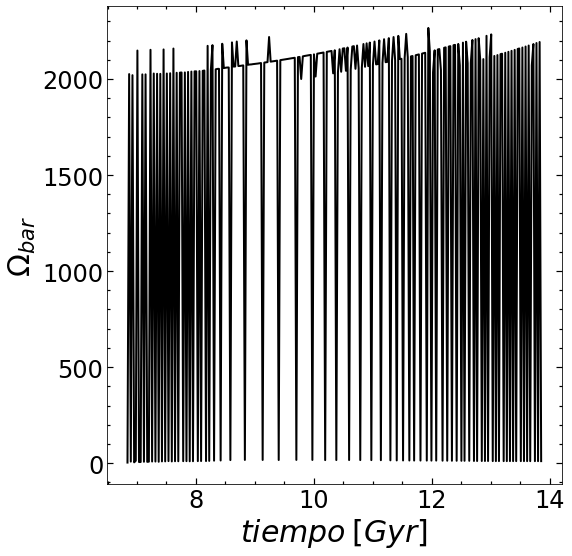

In [35]:
kk = len(ang)-1

delta_phi = np.zeros(len(ang))
delta_t = np.zeros(len(ang))
tt = np.zeros(len(ang))

for i in range(kk,0,-1):
    delta_t [i]  = time_M31gd12[i-1] - time_M31gd12[i]
    delta_phi[i] = ang[i-1] - ang[i]
    tt[i] = (time_M31gd12[i-1] + time_M31gd12[i]) / 2.

delta_t   = delta_t[1:]
delta_phi = delta_phi[1:]
tt = tt[1:]

veloc_ang = delta_phi/delta_t

#-------------------------------------------------------------------------------------
# d = np.ndarray([np.size(tt),2])
# d[:,0] = tt
# d[:,1] = veloc_ang

# np.savetxt('/home/ornela/python/barras/derivada_phi_time.dat', d, fmt=('%12.6f', '%12.6f'))
#-------------------------------------------------------------------------------------

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(tt, veloc_ang/(2*pi),'k-', lw=2)
# ax.set_xlim(7.5,14)
# ax.set_ylim(8,18)
# ax.spines['bottom'].set_color('w')
# ax.spines['top'].set_color('w')
# ax.spines['left'].set_color('w')
# ax.spines['right'].set_color('w')
ax.minorticks_on()
ax.tick_params(labelsize=24)#, colors='lightgray')
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
# ax.set_facecolor('silver')
# ax.grid(color='w',linestyle=':',which='major')
#ax.grid(color='lightgray',linestyle=':',which='minor')
ax.set_xlabel(r'$tiempo\:[Gyr]$', fontsize=30)#, color='lightgray')
ax.set_ylabel(r'$\Omega_{bar}$',fontsize=30)#, color='lightgray')
#ax3.twinx() #me hace un eje del otro lado
#ax3.axis('square') #hace el plot cuadrado
#ax3.set_axisbelow(True)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_04.pdf', dpi = 100)
plt.show()

### Grafico el viejo phi

In [52]:
data = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd_/barras/phi_time.dat')
snap = data[:,0]
time = data[:,1]
phi  = data[:,2]

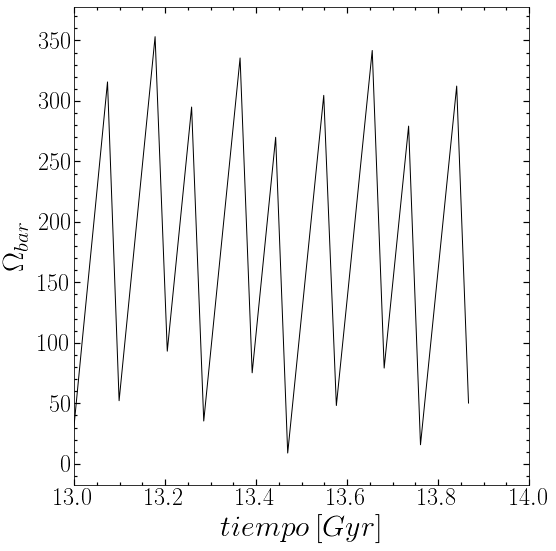

In [53]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time, phi,'k-', lw=1)
ax.set_xlim(13,14)
# ax.set_ylim(8,18)
# ax.spines['bottom'].set_color('w')
# ax.spines['top'].set_color('w')
# ax.spines['left'].set_color('w')
# ax.spines['right'].set_color('w')
ax.minorticks_on()
ax.tick_params(labelsize=24)#, colors='lightgray')
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
# ax.set_facecolor('silver')
# ax.grid(color='w',linestyle=':',which='major')
#ax.grid(color='lightgray',linestyle=':',which='minor')
ax.set_xlabel(r'$tiempo\:[Gyr]$', fontsize=30)#, color='lightgray')
ax.set_ylabel(r'$\Omega_{bar}$',fontsize=30)#, color='lightgray')
#ax3.twinx() #me hace un eje del otro lado
#ax3.axis('square') #hace el plot cuadrado
#ax3.set_axisbelow(True)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_04.pdf', dpi = 100)
plt.show()

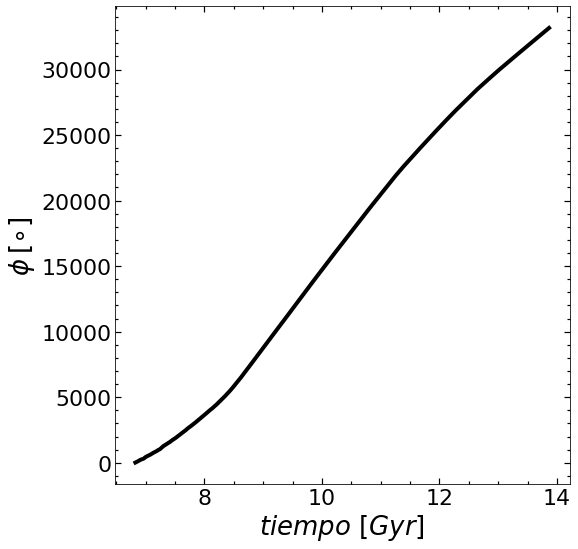

In [44]:
mask1, = np.where(time > 6.8) 
t1     = time[mask1]
phi1   = phi[mask1]
        
ang1 = np.zeros(len(phi1))
ang1[-1] = phi1[-1]

j = 1
kk = len(phi1)-1

for i in range(kk,0,-1):
    aux = phi1[i] - phi1[i-1]
    
    if aux > 0:
        ang1[i-1] = phi1[i-1] + 360*j
        j += 1
        
    else:
        ang1[i-1] = phi1[i-1] + 360*(j-1)
        
# for i in range(aa,-1,-1):
# aux = phi[i+1]-phi[i]
# print aux

# p1 = polyfit(time,phi21,2)
# print p1
 
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
#ax.plot(t0,ang0,'-', lw=4, color='r')
ax.plot(t1,ang1,'-', lw=4, color='k')
#ax.set_xlim(2,14)
#ax.set_ylim(0.,0.5)
# ax.spines['bottom'].set_color('w')
# ax.spines['top'].set_color('w')
# ax.spines['left'].set_color('w')
# ax.spines['right'].set_color('w')
ax.minorticks_on()
ax.tick_params( labelsize=22)#, colors='lightgray')
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
# ax.set_facecolor('silver')
# ax.grid(color='w',linestyle=':',which='major')
#ax.grid(color='lightgray',linestyle=':',which='minor')
ax.set_xlabel(r'$tiempo$ $[Gyr]$', fontsize=26)#, color='lightgray')
ax.set_ylabel(r'$\phi \: [\circ]$',fontsize=26)#, color='lightgray')
plt.show()

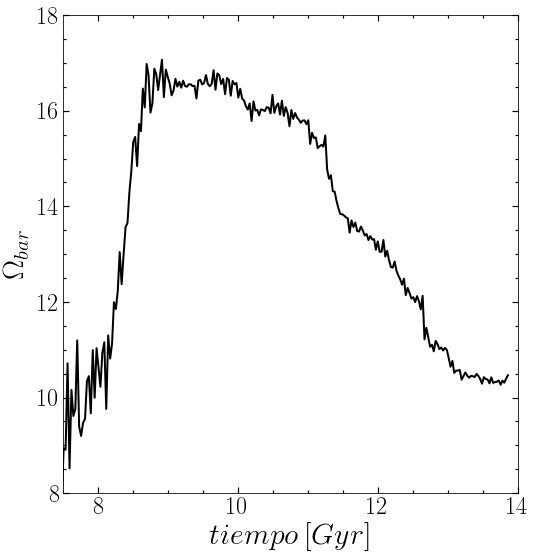

In [50]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

kk = len(ang1)-1

delta_phi = np.zeros(len(ang1))
delta_t = np.zeros(len(ang1))
tt = np.zeros(len(ang1))

for i in range(kk,0,-1):
    delta_t [i]  = time[i-1] - time[i]
    delta_phi[i] = ang1[i-1] - ang1[i]
    tt[i] = (time[i-1] + time[i]) / 2.

delta_t   = delta_t[1:]
delta_phi = delta_phi[1:]
tt = tt[1:]

veloc_ang = delta_phi/delta_t

#-------------------------------------------------------------------------------------
# d = np.ndarray([np.size(tt),2])
# d[:,0] = tt
# d[:,1] = veloc_ang

# np.savetxt('/home/ornela/python/barras/derivada_phi_time.dat', d, fmt=('%12.6f', '%12.6f'))
#-------------------------------------------------------------------------------------

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(tt, veloc_ang/360.,'k-', lw=2)
ax.set_xlim(7.5,14)
ax.set_ylim(8,18)
# ax.spines['bottom'].set_color('w')
# ax.spines['top'].set_color('w')
# ax.spines['left'].set_color('w')
# ax.spines['right'].set_color('w')
ax.minorticks_on()
ax.tick_params(labelsize=24)#, colors='lightgray')
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')#,colors='w')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on')#,colors='w')  
# ax.set_facecolor('silver')
# ax.grid(color='w',linestyle=':',which='major')
#ax.grid(color='lightgray',linestyle=':',which='minor')
ax.set_xlabel(r'$tiempo\:[Gyr]$', fontsize=30)#, color='lightgray')
ax.set_ylabel(r'$\Omega_{bar}$',fontsize=30)#, color='lightgray')
#ax3.twinx() #me hace un eje del otro lado
#ax3.axis('square') #hace el plot cuadrado
#ax3.set_axisbelow(True)

plt.show()